In [80]:
import re
import unicodedata
import pandas as pd
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt

In [45]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [99]:
df = pd.read_csv("tng.csv")
df.shape

(51988, 3)

In [24]:
df.character.value_counts().head()

PICARD     10687
RIKER       6109
DATA        5372
LAFORGE     3657
WORF        3277
Name: character, dtype: int64

In [57]:
labels = pd.concat([df.character.value_counts(),
                    df.character.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels[:15]

,n,percent
PICARD,10687,0.205567
RIKER,6109,0.117508
DATA,5372,0.103332
LAFORGE,3657,0.070343
WORF,3277,0.063034
TROI,2879,0.055378
CRUSHER,2716,0.052243
WESLEY,1238,0.023813
Q,490,0.009425
COMPUTER,485,0.009329


In [71]:
top_15 = labels.index.tolist()[:15]

In [72]:
df[df.character.isin(top_15)]

,episode_name,line,character
0,Encounter at Farpoint,Difficult? Simply solve the mystery of Farpoi...,DATA
1,Encounter at Farpoint,As simple as that.,PICARD
2,Encounter at Farpoint,Farpoint Station. Even the name sounds myster...,TROI
3,Encounter at Farpoint,"It's hardly simple, Data, to negotiate a frie...",PICARD
4,Encounter at Farpoint,Inquiry. The word snoop?,DATA
...,...,...,...
51983,All Good Things,Of course. Have a seat.,RIKER
51984,All Good Things,"Would you care to deal, sir?",DATA
51985,All Good Things,"Oh, er, thank you, Mister Data. Actually, I u...",PICARD
51986,All Good Things,You were always welcome.,TROI


In [30]:
# # All lines
# raw_lines = " ".join(df.line)
# all_words = clean(raw_lines)
# all_freq = pd.Series(all_words).value_counts()
# all_freq.head(20)

In [73]:
data = df[df.character == "DATA"]

In [82]:
data_cloud = " ".join(data.line)

In [83]:
data_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(data.line))

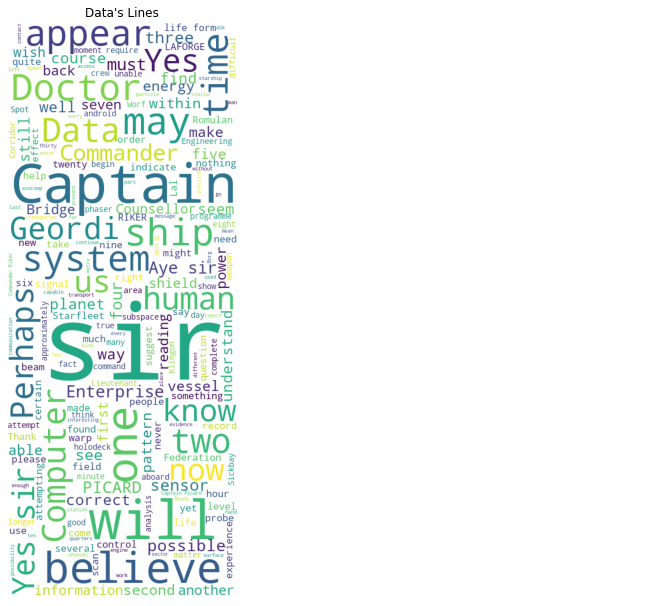

In [84]:
plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(data_cloud)
# axs[1].imshow(ham_cloud)
# axs[2].imshow(spam_cloud)

axs[0].set_title("Data's Lines")
# axs[1].set_title('Ham')
# axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

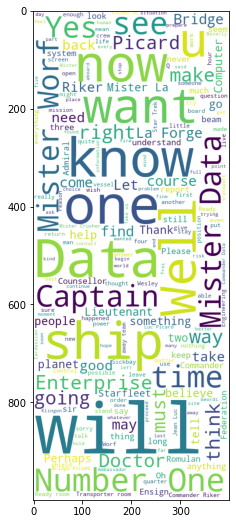

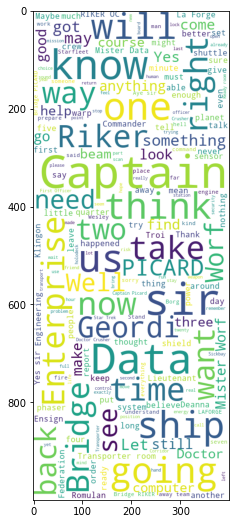

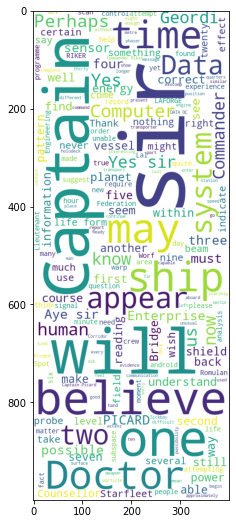

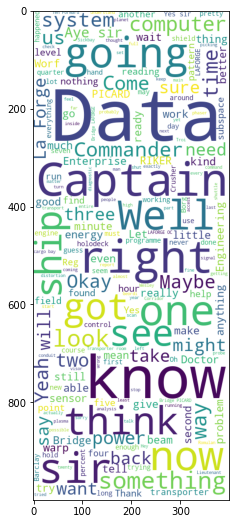

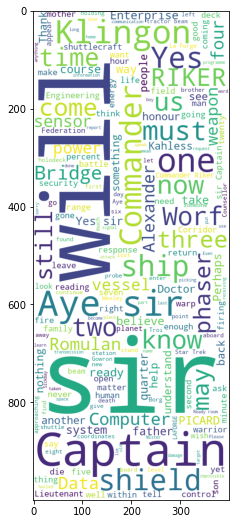

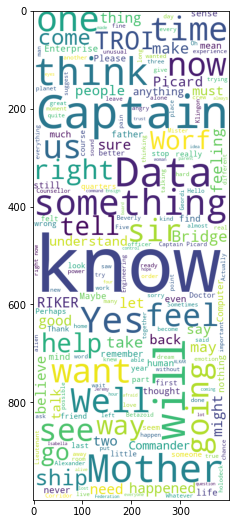

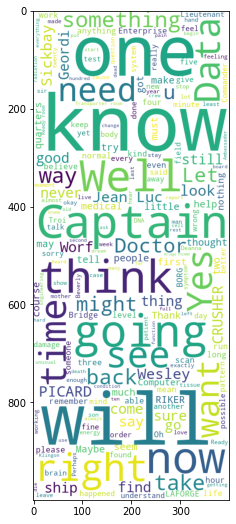

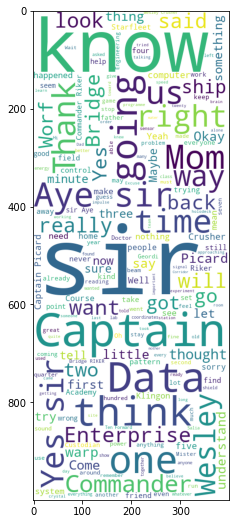

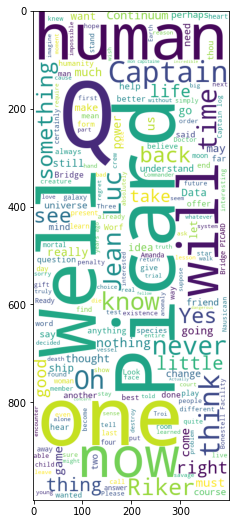

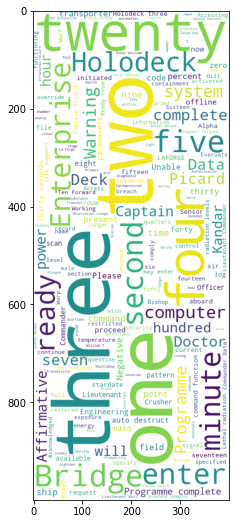

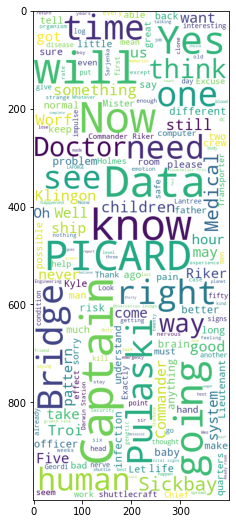

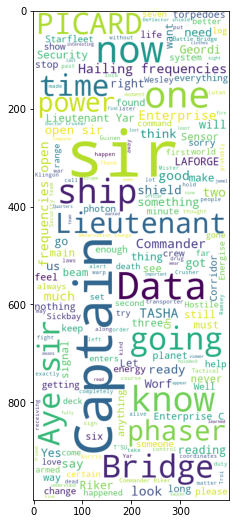

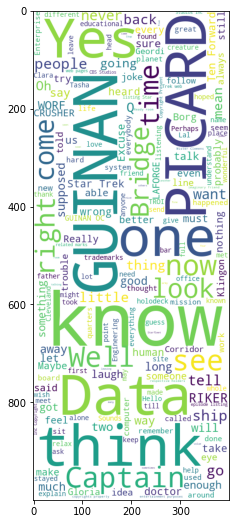

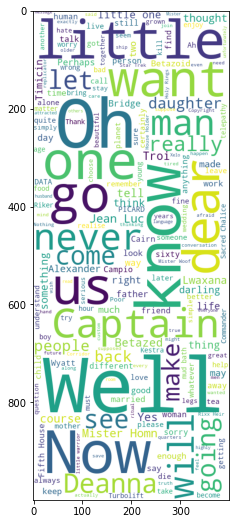

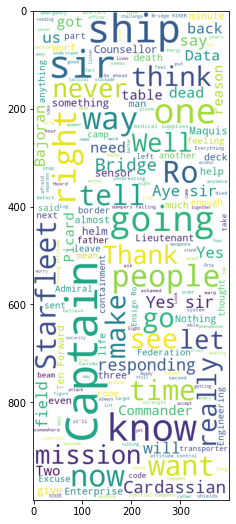

In [95]:


for character in top_15:
    plt.figure(figsize=(12, 9))
    character_df = df[df.character == character]
    
    lines = " ".join(character_df.line)
    
    word_cloud = WordCloud(background_color='white', height=1000, width=400).generate(lines)
    plt.imshow(word_cloud)
    

In [96]:
top_15

['PICARD',
 'RIKER',
 'DATA',
 'LAFORGE',
 'WORF',
 'TROI',
 'CRUSHER',
 'WESLEY',
 'Q',
 'COMPUTER',
 'PULASKI',
 'TASHA',
 'GUINAN',
 'LWAXANA',
 'RO']

In [102]:
" ".join(df[df.character == "GUINAN"].line)

" Captain.  Can I get you something?  I don't blame you. It's beautiful.  How about some nice Mareuvian Tea?  You'll be leaving soon.  What do you see when you look out there?  That's not what I mean. I mean, when you look there, don't you\r\nsee your future?  How about a cup of nectar direct from Prometheus?  It's what I'm expected to do. Don't you always do what's\r\nexpected?  Even if it's not what you really want?  Yes. But sometimes the game is to know when to consider\r\nyourself before others. Give yourself permission to be selfish.\r\n\n[Cargo deck five]\n\nDEALT: Something's wrong.  Sure I do. All the time.  Oh?  No, I never knew the Captain till I came onboard.  Yes, I'll bet they are.  Where do they say?  For a dish of Delovian soufflé?  That's why I'm here.  I never said that. I simply said that I've never seen you\r\nlaugh.  Data, do you even know what a joke is?  Stop. Look, it's just you and I here. We're talking, we're\r\nhaving an intimate conversation. Why? Because yo

,episode_name,line,character
0,Encounter at Farpoint,Difficult? Simply solve the mystery of Farpoi...,DATA
1,Encounter at Farpoint,As simple as that.,PICARD
2,Encounter at Farpoint,Farpoint Station. Even the name sounds myster...,TROI
3,Encounter at Farpoint,"It's hardly simple, Data, to negotiate a frie...",PICARD
4,Encounter at Farpoint,Inquiry. The word snoop?,DATA
...,...,...,...
51983,All Good Things,Of course. Have a seat.,RIKER
51984,All Good Things,"Would you care to deal, sir?",DATA
51985,All Good Things,"Oh, er, thank you, Mister Data. Actually, I u...",PICARD
51986,All Good Things,You were always welcome.,TROI
